In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import read_geolife
import tracers as tr
import matplotlib.pyplot as plt
from pyproj import Transformer
import math
import seaborn as sns
import os

In [2]:
root_path = "/mnt/d/maart18maxDist500noDROPv2"
perturbed_traces = []

space_noise, time_min_period = 80.0, 30 
traces = []
# Load and perturb traces user by user
for i in range(50):
    user_path = f'taxi_{i}'
    file_path = os.path.join(root_path, user_path)
    user_traces = []
    
    if os.path.exists(file_path):
        for file in os.scandir(file_path): 
            df = pd.read_csv(file, sep=",")
            
            # Convert timestamp to epoch, drop invalid timestamps
            df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="ISO8601", errors="coerce").astype(int) / 10**9
            df = df.dropna(subset=["Timestamp"])
            
            # Sort by time
            df = df.sort_values(by='Timestamp')

            trace = df[['Longitude', 'Latitude', 'Timestamp']].to_numpy()
            trace = [(x[0], x[1], int(x[2])) for x in trace]
            
            user_traces.append(trace)
    else:
        print("path not found")
    if user_traces:
        perturbed_user_traces = tr.perturb_traces((space_noise, time_min_period), user_traces, picker_str='closest')
        perturbed_traces.extend(perturbed_user_traces)
        traces.extend(user_traces)

print(f"Total perturbed traces: {len(perturbed_traces)}")


path not found
path not found
path not found
path not found
path not found
path not found
path not found
path not found
path not found
path not found
path not found
path not found
path not found
path not found
path not found
path not found
path not found
path not found
Total perturbed traces: 4401


In [ ]:
noise_distr = []
prev_pert_lat = 0
prev_pert_lon = 0 

for trace_idx in range(len(traces)):
  
    for point_idx in range(len(traces[trace_idx])):
        perturbed_traces_lon, perturbed_traces_lat = perturbed_traces[trace_idx][point_idx][0], perturbed_traces[trace_idx][point_idx][1]
        traces_lon, traces_lat = traces[trace_idx][point_idx][0], traces[trace_idx][point_idx][1]

        # When perturbed point changes, compare it to the non-perturbed point at the same index
        if not (prev_pert_lat == perturbed_traces_lat and prev_pert_lon == perturbed_traces_lon):
            current_lat, current_lon = traces_lat, traces_lon
    
        #ELSE: keep comparing it to the non-perturbed corresponding to the first 
        # perturbed point of a group perturbed points at the same location 
        
        prev_pert_lon = perturbed_traces_lon
        prev_pert_lat = perturbed_traces_lat
        noise = tr.rs_geodesic_distance((perturbed_traces_lon,perturbed_traces_lat),(current_lon,current_lat))
        noise_distr.append(noise)


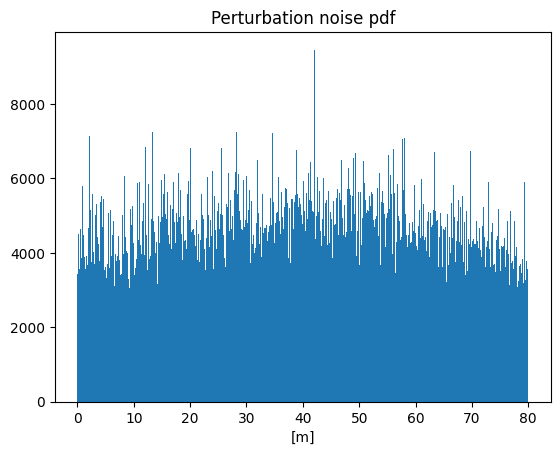

79.99989844380009


In [5]:
plt.hist(noise_distr,bins=500)
plt.title('Perturbation noise pdf')
plt.xlabel('[m]')
plt.show()
print(max(noise_distr))